# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
from scipy.stats import norm, kurtosis
from scipy import stats
import math
import sympy

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [2]:
# your answer here
temp = pd.read_csv("Temp_States.csv")

#### Print `temp`

In [3]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [4]:
# your answer here
temp.dtypes
#Los valores distintos a los númericos son definidos como objetos para su posterior tratamiento

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [7]:
NewYork = temp[(temp["State"] == "New York")]
NewYork

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [9]:
# your answer here
NewYork["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [10]:
# your answer here
temp[(temp["Temperature"] > 15)]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [12]:
temp[(temp["Temperature"] > 15)]["City"]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [13]:
# your answer here
temp[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)]["City"]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [19]:
# your answer here
for state in temp["State"].unique():
    print(f"{state} temperature mean {temp[temp['State'] == state].mean()}")
    print(f"{state} temperature std {temp[temp['State'] == state].std()}")

New York temperature mean Temperature    10.740741
dtype: float64
New York temperature std Temperature    8.133404
dtype: float64
Connecticut temperature mean Temperature    15.833333
dtype: float64
Connecticut temperature std Temperature    1.964186
dtype: float64
New Jersey temperature mean Temperature    21.111111
dtype: float64
New Jersey temperature std Temperature    1.571348
dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [22]:
employee = pd.read_csv("employee.csv")
employee.head()

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55


#### Explore the data types of the Temp dataframe. Comment your results

In [21]:
employee.dtypes
#Todo lo diferente a int y str es seteado como objeto para configurarse

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000182543E64C0>,
      dtype=object)

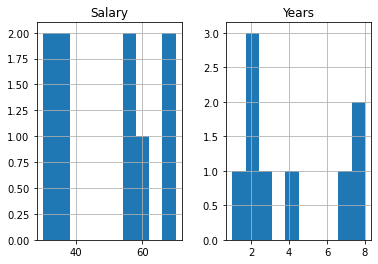

In [23]:
employee.hist()
#Se realiza la graficación de unicamente valores de tipo int
#Y se muestra la cantidad de personas tienen 'x' salario y años

#### What's the average salary in this company?

In [24]:
employee["Salary"].mean()

48.888888888888886

#### What's the highest salary?

In [25]:
employee["Salary"].max()

70

#### What's the lowest salary?

In [26]:
employee["Salary"].min()

30

#### Who are the employees with the lowest salary?

In [27]:
employee[employee["Salary"] == employee["Salary"].min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [29]:
# your answer here
employee[employee["Name"] == "David"]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [30]:
employee[employee["Name"] == "David"]["Salary"]

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [31]:
employee[employee["Title"] == "associate"]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [32]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [33]:
# your answer here- 2nd method
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [35]:
employee[(employee["Title"] == "associate") & (employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [41]:
employee.groupby(["Years"])["Salary"].mean()


Years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: Salary, dtype: float64

####  What is the average Salary per title?

In [42]:
employee.groupby(["Title"])["Salary"].mean()

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

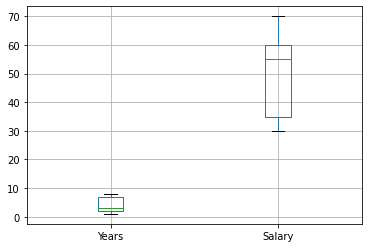

In [43]:
# draw boxplot here
employee.boxplot()

In [45]:
# print first quartile here
employee.quantile(0.25)

Years      2.0
Salary    35.0
Name: 0.25, dtype: float64

In [46]:
# print third quartile here
employee.quantile(0.75)

Years      7.0
Salary    60.0
Name: 0.75, dtype: float64

#### Is the mean salary per gender different?

In [48]:
# your answer here
f_gender = employee[employee["Gender"]=="F"]["Salary"].mean()
m_gender = employee[employee["Gender"]=="M"]["Salary"].mean()
print(f"F:{f_gender}  -   M:{m_gender}, son iguales? {f_gender==m_gender}")

F:47.5  -   M:50.0, son iguales? False


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [51]:
# your answer here
for department in employee["Department"].unique():
    print(f"{department} data {employee[employee['Department'] == department].describe()}")

IT data           Years    Salary
count  4.000000   4.00000
mean   4.500000  48.75000
std    3.511885  19.31105
min    1.000000  30.00000
25%    1.750000  33.75000
50%    4.500000  47.50000
75%    7.250000  62.50000
max    8.000000  70.00000
HR data           Years     Salary
count  3.000000   3.000000
mean   4.666667  45.000000
std    3.055050  21.794495
min    2.000000  30.000000
25%    3.000000  32.500000
50%    4.000000  35.000000
75%    6.000000  52.500000
max    8.000000  70.000000
Sales data           Years  Salary
count  2.000000     2.0
mean   2.500000    55.0
std    0.707107     0.0
min    2.000000    55.0
25%    2.250000    55.0
50%    2.500000    55.0
75%    2.750000    55.0
max    3.000000    55.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [53]:
orders = pd.read_csv("Orders.csv")
orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [54]:
orders.dtypes

Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [55]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [58]:
orders["amount_spent"].mean()

22.39474850474768

#### What were the highest and lowest purchase prices? 

In [59]:
orders["amount_spent"].min()

0.0

In [60]:
orders["amount_spent"].max()

168469.6

#### Select all the customers we have in Spain

In [62]:
spain_cust =orders[orders["Country"] == "Spain"]["CustomerID"]

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [63]:
len(spain_cust)

2485

#### Select all the customers who have bought more than 50 items ?

In [64]:
over50_cust =orders[orders["Quantity"] > 50]["CustomerID"]

#### Select orders from Spain that are above 50 items

In [67]:
ficty = orders[(orders["Quantity"] > 50) & (orders["Country"] == "Spain")]
ficty.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [68]:
orders[orders["amount_spent"] == 0]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,56674,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,86789,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,130188,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,139453,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,145208,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [75]:
selected_row = []
for index in orders.index:
    if "lunch bag" in orders.iloc[index][7]:
        selected_row.append(index)
        
lunchBag = orders.iloc[selected_row]

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [77]:
lunchBag[lunchBag["year"] == 2011].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

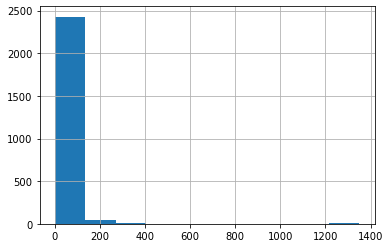

In [78]:
orders[orders["Country"]=="Spain"]["amount_spent"].hist()

#### Select all orders made in the month of August

In [79]:
orders[orders["month"]==8].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [80]:
orders[orders["month"]==8]["Country"].value_counts()

United Kingdom     23105
Germany              795
EIRE                 593
France               569
Netherlands          280
Switzerland          267
Spain                252
Belgium              194
Israel               171
Channel Islands      140
Australia            107
Italy                 95
Austria               88
Norway                77
Finland               61
Malta                 55
Portugal              41
Sweden                40
Unspecified           23
Iceland               22
Poland                17
Denmark               16
Canada                 5
Name: Country, dtype: int64

#### What's the  average amount of money spent by country

In [81]:
orders.groupby(["Country"]).mean()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
Country,,,,,,,,,,
Australia,224857.287764,556217.951055,2010.972996,6.062447,3.354430,11.398312,71.062447,3.048523,12454.454008,116.895620
Austria,297239.085427,562367.633166,2010.979899,7.623116,2.778894,12.170854,12.263819,4.256030,12519.097990,25.624824
Bahrain,184964.000000,552790.411765,2011.000000,5.000000,1.705882,13.941176,15.294118,4.644118,12354.529412,32.258824
Belgium,276657.968981,560543.014279,2010.953225,7.404727,3.671098,12.225997,11.441162,3.630158,12430.675037,20.283772
Brazil,157314.500000,550201.000000,2011.000000,4.000000,5.000000,10.000000,11.125000,4.456250,12769.000000,35.737500
Canada,240605.867550,557964.476821,2011.000000,6.377483,1.139073,9.867550,18.298013,6.030331,17321.079470,24.280662
Channel Islands,255107.524064,558786.728610,2010.977273,6.791444,3.437166,10.994652,12.688503,4.531618,14890.822193,27.340160
Cyprus,236759.193811,556821.771987,2010.864821,7.311075,3.312704,12.024430,10.359935,5.710391,12405.381107,22.134169
Czech Republic,215563.200000,555053.600000,2011.000000,5.200000,2.600000,8.800000,26.840000,3.130800,12781.000000,33.069600


#### What's the most expensive item?

In [82]:
orders[orders["UnitPrice"]==orders["UnitPrice"].max()]["Description"]

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [83]:
orders.groupby(["year"])["amount_spent"].mean()# your answer here

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64